In [1]:
import pandas as pd
import numpy as np  
from datetime import datetime

In [5]:
df = pd.read_csv('DA_Banking.csv')
df.head(5)

,Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
0,IND81288,Raymond Mills,24,34324,06-05-2019,Anthony Torres,American,Safety Technician IV,High,Jade,...,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,Retail,Male,Victor Dean
1,IND65833,Julia Spencer,23,42205,10-12-2001,Jonathan Hawkins,African,Software Consultant,High,Jade,...,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,Institutional,Male,Jeremy Porter
2,IND47499,Stephen Murray,27,7314,25-01-2010,Anthony Berry,European,Help Desk Operator,High,Gold,...,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,Private Bank,Female,Ernest Knight
3,IND72498,Virginia Garza,40,34594,28-03-2019,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,Commercial,Male,Eric Shaw
4,IND60181,Melissa Sanders,46,41269,20-07-2012,Shawn Long,American,Assistant Professor,Mid,Platinum,...,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3,Retail,Female,Kevin Kim


In [11]:
# 1. Date Conversion & Tenure Calculation
df['Joined Bank'] = pd.to_datetime(df['Joined Bank'], format='%d-%m-%Y')
df['Tenure_Years'] = (datetime.now() - df['Joined Bank']).dt.days / 365.25
df['Tenure_Years'] = df['Tenure_Years'].round(1)
df[['Joined Bank', 'Tenure_Years']].head(10)


,Joined Bank,Tenure_Years
0,2019-05-06,6.6
1,2001-12-10,24.0
2,2010-01-25,15.8
3,2019-03-28,6.7
4,2012-07-20,13.3
5,2019-02-07,6.8
6,2002-06-02,23.5
7,2000-11-03,25.1
8,2015-04-07,10.6
9,1995-11-20,30.0


In [12]:
# 2. Creating Age Groups
bins_age = [0, 30, 45, 60, 100]
labels_age = ['Young Adult', 'Adult', 'Middle-Aged', 'Senior']
df['Age_Group'] = pd.cut(df['Age'], bins=bins_age, labels=labels_age)
df[['Age','Age_Group']].head(10)

,Age,Age_Group
0,24,Young Adult
1,23,Young Adult
2,27,Young Adult
3,40,Adult
4,46,Middle-Aged
5,23,Young Adult
6,46,Middle-Aged
7,78,Senior
8,67,Senior
9,51,Middle-Aged


In [15]:
# 3. Creating Income Bands
bins_income = [0, 100000, 300000, float('inf')]
labels_income = ['Low', 'Medium', 'High']
df['Income_Band'] = pd.cut(df['Estimated Income'], bins=bins_income, labels=labels_income)
df['Estimated Income'] = df['Estimated Income'].round()
df[['Estimated Income','Income_Band']].head(10)

,Estimated Income,Income_Band
0,75385.0,Low
1,289834.0,Medium
2,169935.0,Medium
3,356808.0,High
4,130712.0,Medium
5,118327.0,Medium
6,57336.0,Low
7,65126.0,Low
8,87849.0,Low
9,65369.0,Low


In [16]:
# 4. Calculating Total Financial Assets
df['Total_Assets'] = (
    df['Bank Deposits'] + 
    df['Checking Accounts'] + 
    df['Saving Accounts'] + 
    df['Superannuation Savings']
)
df['Total_Assets'].head(5)

0    2714456.93
1    1233038.24
2    1931956.53
3    2336473.15
4    1110855.83
Name: Total_Assets, dtype: float64

In [19]:
# 5. Creating a 'VIP Status' flag for customers with > $2M in assets
df['VIP_Status'] = np.where(df['Total_Assets'] > 2000000, 'VIP', 'Standard')
df[['Total_Assets','VIP_Status']].head(5)

,Total_Assets,VIP_Status
0,2714456.93,VIP
1,1233038.24,Standard
2,1931956.53,Standard
3,2336473.15,VIP
4,1110855.83,Standard


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Client ID                 3000 non-null   object        
 1   Name                      3000 non-null   object        
 2   Age                       3000 non-null   int64         
 3   Location ID               3000 non-null   int64         
 4   Joined Bank               3000 non-null   datetime64[ns]
 5   Banking Contact           3000 non-null   object        
 6   Nationality               3000 non-null   object        
 7   Occupation                3000 non-null   object        
 8   Fee Structure             3000 non-null   object        
 9   Loyalty Classification    3000 non-null   object        
 10  Estimated Income          3000 non-null   float64       
 11  Superannuation Savings    3000 non-null   float64       
 12  Amount of Credit Car

In [21]:
# Export for Power BI
df.to_csv('Cleaned_DA_Banking.csv', index=False)

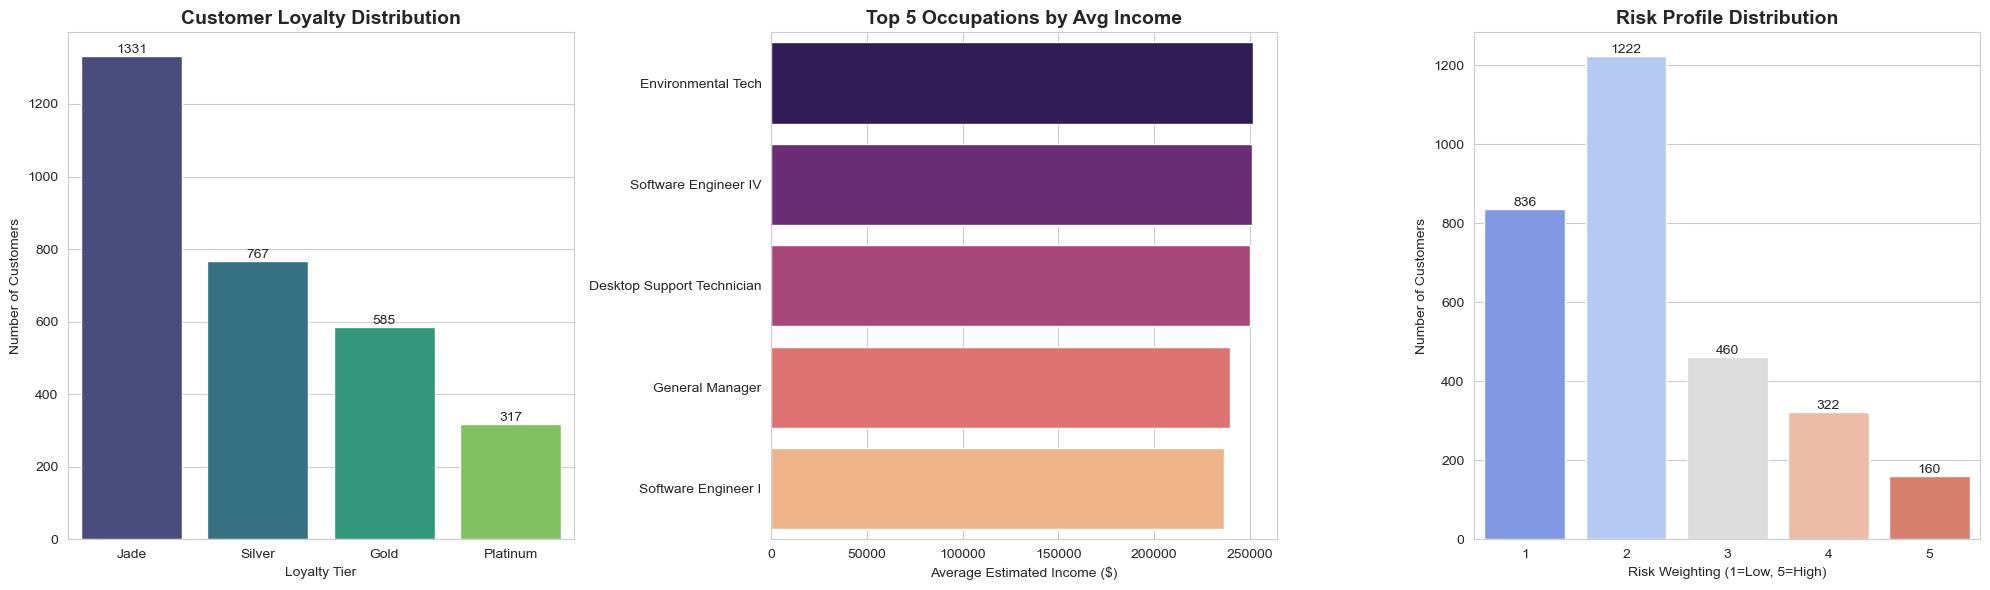

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Cleaned_DA_Banking.csv')

# Set a clean visual style
sns.set_style("whitegrid")

# Create a figure with 3 subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# --- Graph 1: Loyalty Classification Distribution ---
loyalty_counts = df['Loyalty Classification'].value_counts()
sns.barplot(x=loyalty_counts.index, y=loyalty_counts.values, ax=axes[0], palette="viridis")

axes[0].set_title('Customer Loyalty Distribution', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Number of Customers')
axes[0].set_xlabel('Loyalty Tier')

# Add counts on top of bars
for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height())}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom', fontsize=10)
    # --- Graph 2: Top 5 Occupations by Income ---
# Group by occupation, calculate mean income, and take top 5
top_occupations = df.groupby('Occupation')['Estimated Income'].mean().sort_values(ascending=False).head(5)

# Horizontal bar chart is best for long labels
sns.barplot(x=top_occupations.values, y=top_occupations.index, ax=axes[1], palette="magma")

axes[1].set_title('Top 5 Occupations by Avg Income', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Average Estimated Income ($)')
axes[1].set_ylabel('') # Hide y-label for cleaner look


# --- Graph 3: Risk Profile Distribution ---
risk_counts = df['Risk Weighting'].value_counts().sort_index()
sns.barplot(x=risk_counts.index, y=risk_counts.values, ax=axes[2], palette="coolwarm")

axes[2].set_title('Risk Profile Distribution', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Risk Weighting (1=Low, 5=High)')
axes[2].set_ylabel('Number of Customers')

# Add counts on top of bars
for p in axes[2].patches:
    axes[2].annotate(f'{int(p.get_height())}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

Text(580.6838235294118, 0.5, '')

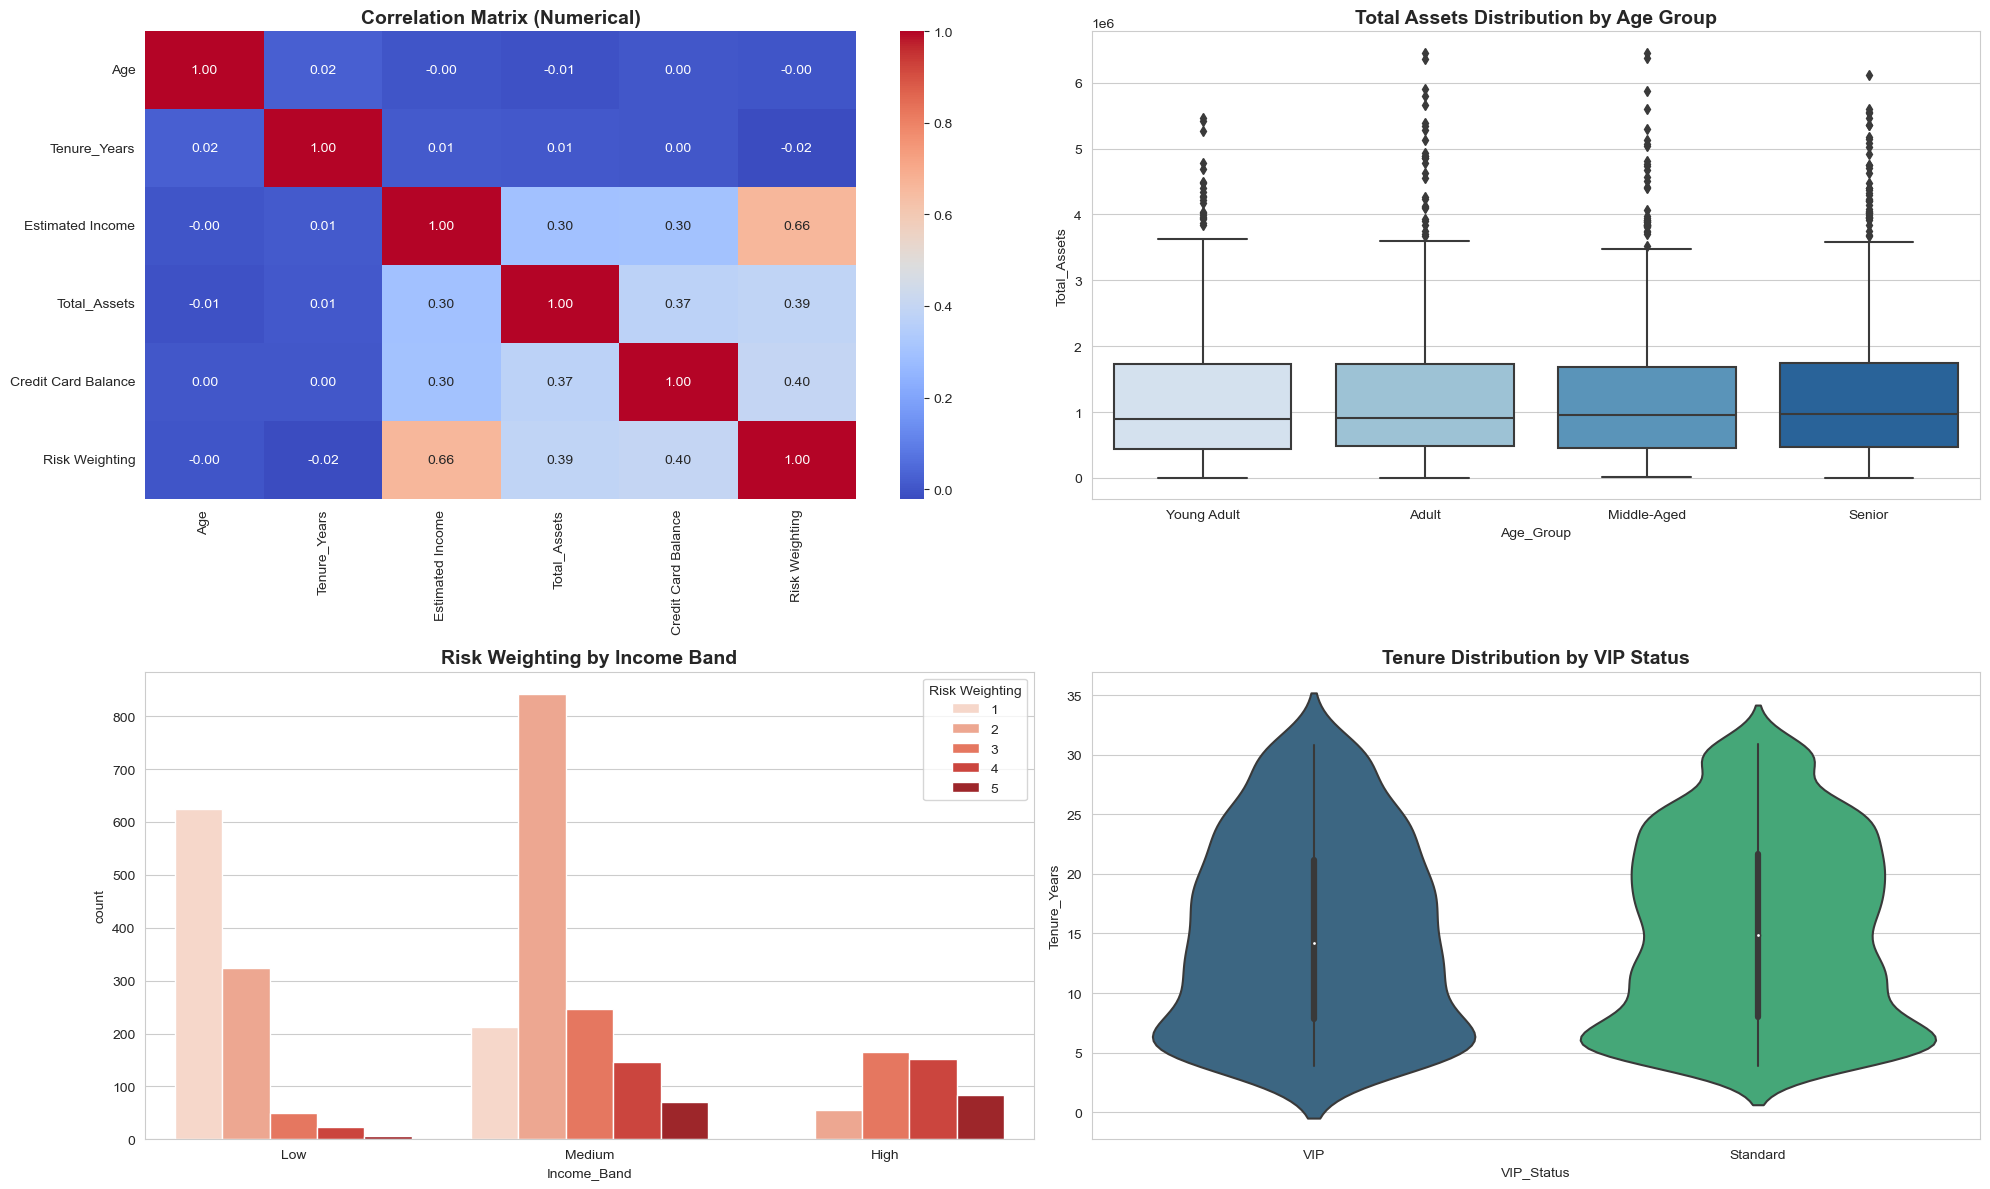

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

df = pd.read_csv('Cleaned_DA_Banking.csv')

sns.set_style("whitegrid")
fig = plt.figure(figsize=(20, 12))

# 1. Correlation Matrix (Numerical)
ax1 = plt.subplot(2, 2, 1)
numerical_cols = ['Age', 'Tenure_Years', 'Estimated Income', 'Total_Assets', 'Credit Card Balance', 'Risk Weighting']
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", ax=ax1)
ax1.set_title('Correlation Matrix (Numerical)', fontsize=14, fontweight='bold')

# 2. Total Assets by Age Group (Box Plot)
ax2 = plt.subplot(2, 2, 2)
sns.boxplot(x='Age_Group', y='Total_Assets', data=df, palette="Blues", ax=ax2)
ax2.set_title('Total Assets Distribution by Age Group', fontsize=14, fontweight='bold')

# 3. Risk Weighting by Income Band (Count Plot)
ax3 = plt.subplot(2, 2, 3)
sns.countplot(x='Income_Band', hue='Risk Weighting', data=df, palette="Reds", ax=ax3)
ax3.set_title('Risk Weighting by Income Band', fontsize=14, fontweight='bold')

# 4. Tenure by VIP Status (Violin Plot)
ax4 = plt.subplot(2, 2, 4)
sns.violinplot(x='VIP_Status', y='Tenure_Years', data=df, palette="viridis", ax=ax4)
ax4.set_title('Tenure Distribution by VIP Status', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

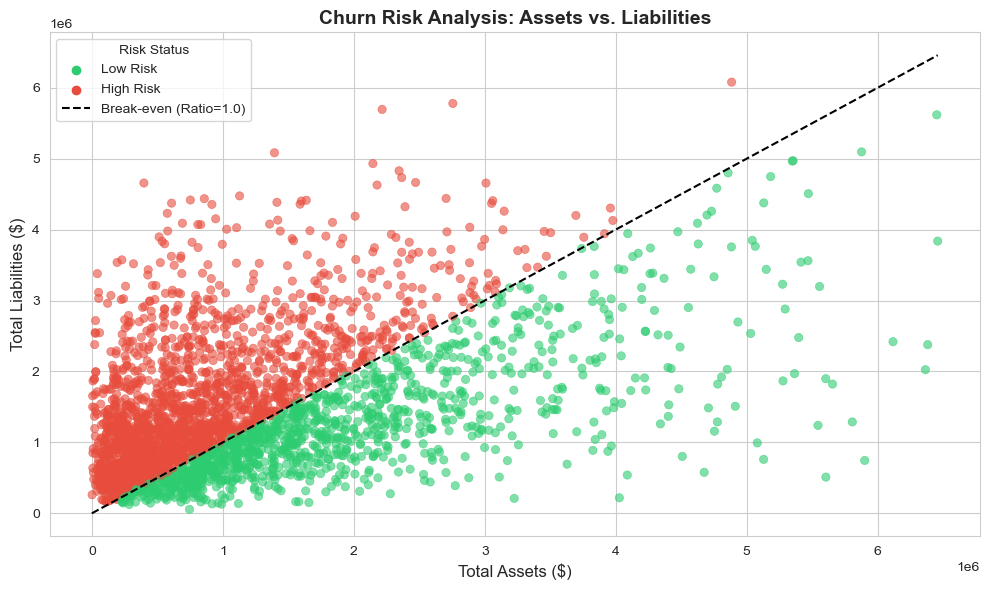

--- Churn Risk Distribution ---
High Risk    1849
Low Risk     1151
Name: Churn_Risk_Flag, dtype: int64

--- Average Income by Risk Status ---
Churn_Risk_Flag
High Risk    169887.114657
Low Risk     173582.825369
Name: Estimated Income, dtype: float64


In [26]:
    df['Total_Liabilities'] = (
    df['Bank Loans'] + 
    df['Credit Card Balance'] + 
    df['Business Lending']
)

# 2. Define Churn Risk Logic
# Logic: If Liabilities > Assets, the customer is over-leveraged (High Risk)
df['Debt_Asset_Ratio'] = df['Total_Liabilities'] / df['Total_Assets']
df['Churn_Risk_Flag'] = np.where(df['Debt_Asset_Ratio'] > 1.0, 'High Risk', 'Low Risk')

# --- VISUALIZATION ---
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Scatter Plot with Break-even line
sns.scatterplot(
    data=df, 
    x='Total_Assets', 
    y='Total_Liabilities', 
    hue='Churn_Risk_Flag', 
    palette={'High Risk': '#E74C3C', 'Low Risk': '#2ECC71'}, # Red for Risk, Green for Safe
    alpha=0.6,
    edgecolor=None
)

# Add a diagonal "Break-even" line (where Assets = Liabilities)
max_val = max(df['Total_Assets'].max(), df['Total_Liabilities'].max())
plt.plot([0, max_val], [0, max_val], color='black', linestyle='--', linewidth=1.5, label='Break-even (Ratio=1.0)')

plt.title('Churn Risk Analysis: Assets vs. Liabilities', fontsize=14, fontweight='bold')
plt.xlabel('Total Assets ($)', fontsize=12)
plt.ylabel('Total Liabilities ($)', fontsize=12)
plt.legend(title='Risk Status', loc='upper left')

plt.tight_layout()
plt.show()

# --- SUMMARY STATS ---
print("--- Churn Risk Distribution ---")
print(df['Churn_Risk_Flag'].value_counts())
print("\n--- Average Income by Risk Status ---")
print(df.groupby('Churn_Risk_Flag')['Estimated Income'].mean())